In [1]:
from keras.models import Model
from keras import layers
from keras import Input

text1_max_words = 10000 #text1(질문)의 단어 크기
text2_max_words = 10000 #text2(정보)의 단어 크기
answer_max_words = 500  #answer(대답)의 단어 크기

Using TensorFlow backend.


In [2]:
text1_input = Input(shape=(None,), dtype='int32', name='text1')
embedded_text1 = layers.Embedding(text1_max_words, 64)(text1_input)
encoded_text1 = layers.LSTM(32)(embedded_text1)

In [3]:
text2_input = Input(shape=(None,), dtype='int32', name='text2')
embedded_text2 = layers.Embedding(text1_max_words, 64)(text2_input)
encoded_text2 = layers.LSTM(32)(embedded_text2)

In [4]:
concatenated = layers.concatenate([encoded_text1, encoded_text2], axis=-1)

In [5]:
import numpy as np

a = np.arange(10).reshape(2, 5)
print('a', a, '\n')

b = np.arange(20, 30).reshape(2, 5)
print('b', b, '\n')

import tensorflow as tf
print('axis=0', tf.keras.layers.concatenate([a, b], axis=0), '\n')
print('axis=1', tf.keras.layers.concatenate([a, b], axis=1), '\n')
print('axis=-1', tf.keras.layers.concatenate([a, b], axis=-1))


a [[0 1 2 3 4]
 [5 6 7 8 9]] 

b [[20 21 22 23 24]
 [25 26 27 28 29]] 

axis=0 tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(4, 5), dtype=int64) 

axis=1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int64) 

axis=-1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int64)


In [6]:
answer = layers.Dense(answer_max_words, activation='softmax')(concatenated)

In [7]:
model = Model(inputs=[text1_input, text2_input], outputs=answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text1 (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
text2 (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     640000      text1[0][0]                      
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     640000      text2[0][0]                      
____________________________________________________________________________________________

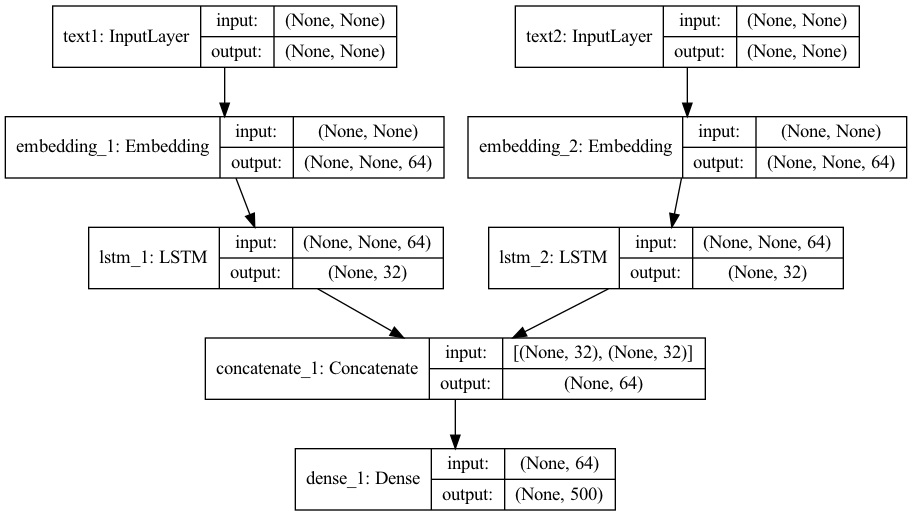

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:
import numpy as np
from tensorflow.keras.utils import to_categorical

num_samples = 1000
max_len = 100

In [12]:
text1 = np.random.randint(low=0, high=text1_max_words, 
                          size=(num_samples, max_len))
text2 = np.random.randint(low=0, high=text2_max_words, 
                          size=(num_samples, max_len))

In [14]:
max(text1[0])

9927

In [15]:
answers = np.random.randint(low=0, high=answer_max_words, 
                           size=(num_samples))
answers = to_categorical(answers)

### 랜덤 함수로 데이터 생성 중 에러가 발생할 수 있다. 이는 snswer의 생성된 숫자가 500개에 미치지 못하여 발생하는 경우로서, 이때는 앞의 코드를 다시 실행한다.

In [ ]:
model.fit({'text1':text1, 'text2':text2}, answers, epochs=3, batch_size=128)
# model.fit([text1, text2], answers, epochs=3, batch_size=128)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3


In [ ]:
prediction = model.predict({'text1':text1, 'text2':text2})
label = np.argmax(prediction[0])
print(label)